<a href="https://colab.research.google.com/github/terra-analitika/OpenPetrophysics/blob/master/OpenPetrophysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OpenPetrophysics**
Author: Yohanes Nuwara

# 1. Setting up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 2. Import well data (LAS) and Markers file

We will import well data `KTB-01` for practice. The well data is in standard LAS format. A library called `lasreader` has been created in the Drive. Import it first to read our data. 

In [0]:
import sys
sys.path.append('/content/drive/My Drive/colab-terra/OpenPetrophysics')
import lasreader

Read LAS data

In [0]:
log = lasreader.LASReader("/content/drive/My Drive/colab-terra/OpenPetrophysics/KTB-01.las", null_subs=np.nan)

We declare the depth

In [0]:
depth = log.data['DEPT']

**Lithology Markers**

Now that the LAS file has been successfully imported, we input the lithology markers. Markers are important to distinguish among different formations in the well data. 

In [0]:
tops = ('Ledok', 'Wonocolo', 'Ngrayong', 'Tawun', 'Kujung')
tops_depths = (275, 340, 1053, 1637, 2777)

**Dataframing**

We can convert our LAS data into a dataframe, just like an Excel spreadsheet. Creating dataframe (using library `pandas`). For example we would like to make a dataframe consists of GR, Perm, DT, PHIE, Vsh, and NPHI. You can add the data yourself. 

In [0]:
import pandas as pd

logfile = pd.DataFrame({"GR":log.data['GR'], "Perm":log.data['Permeability'], "DT":log.data['DT'], "PHIE":log.data['PHIE'], 
                        "Vsh":log.data['Vsh'], "NPHI":log.data['NPHI']})

# 3. Visualizing Log Data

Visualize the well log. First we would like to have the lithology markers appearing in our well data. We create a function to make it appear first.

In [0]:
def attribute(depth, tops, tops_depths, fig, ax):

  for axes in ax:
        axes.set_ylim (min(depth), max(depth))
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=min(depth)) and (i<=max(depth))):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')

Perfect. Let's visualize our well data. For example we would like to view bulk laterolog density log (RHOB), deep resistivity log (LLD), and sonic log (DT)

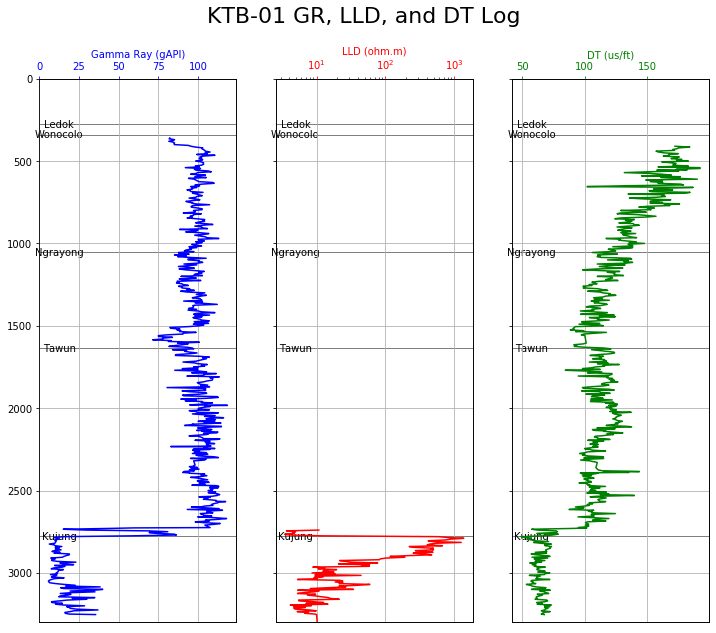

In [17]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)

# markers attribute function that we made is posted here
attribute(depth, tops, tops_depths, fig, ax)

plt.figure(1)
plt.suptitle("KTB-01 GR, LLD, and DT Log", fontsize=22)

# First column first well data
ax01=ax[0].twiny()
ax01.spines['top'].set_position(('outward',0))
ax01.set_xlabel("Gamma Ray (gAPI)")
ax01.plot(log.data['GR'], depth, label='Gamma Ray (gAPI)', color='blue')
ax01.set_xlabel('Gamma Ray (gAPI)',color='blue')    
ax01.tick_params(axis='x', colors='blue')
ax01.grid(True)

# Second column second well data
ax11=ax[1].twiny()
ax11.set_xscale('log') # visualization of resistivity has log scale x axis
ax11.grid(True)
ax11.spines['top'].set_position(('outward',0))
ax11.set_xlabel('LLD (ohm.m)', color='red')
ax11.plot(log.data['LLD'], depth, label='LLD (ohm.m)', color='red')
ax11.tick_params(axis='x', colors='red')

# Third column third well data
ax21=ax[2].twiny()
ax21.grid(True)
ax21.spines['top'].set_position(('outward',0))
ax21.set_xlabel('DT (us/ft)')
ax21.plot(log.data['DT'], depth, label='DT (us/ft)', color='green')
ax21.set_xlabel('DT (us/ft)', color='green')    
ax21.tick_params(axis='x', colors='green')

Beatifully! C'est un belle! However, the **LLD data is not complete** (missing values above depth ~2700 m). We will add into this missing values later in `Step 4`. 


**Cross plot logs**

Another useful representation of well log is cross plot. Let's make a cross plot. 

In [0]:
def xplot(axisx, axisy, axisz):
  plt.scatter(axisx, axisy, c=axisz, s=5, cmap='gist_rainbow')
  plt.colorbar()

Text(0, 0.5, 'RHOB  (g/cc)')

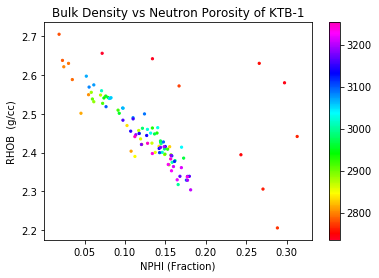

In [19]:
# crossplot RHOB vs NPHI
axisx = log.data['NPHI']
axisy = log.data['RHOB']
axisz = depth

xplot(axisx, axisy, axisz)
plt.title('Bulk Density vs Neutron Porosity of KTB-1')
plt.xlabel('NPHI (Fraction)'); plt.ylabel('RHOB  (g/cc)')

**Visualize all crossplots!**

We have created a Panda dataframe consisting of GR, Perm, DT, PHIE, Vsh, and NPHI. We will show crossplots of each log. Let's use `seaborn` library.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


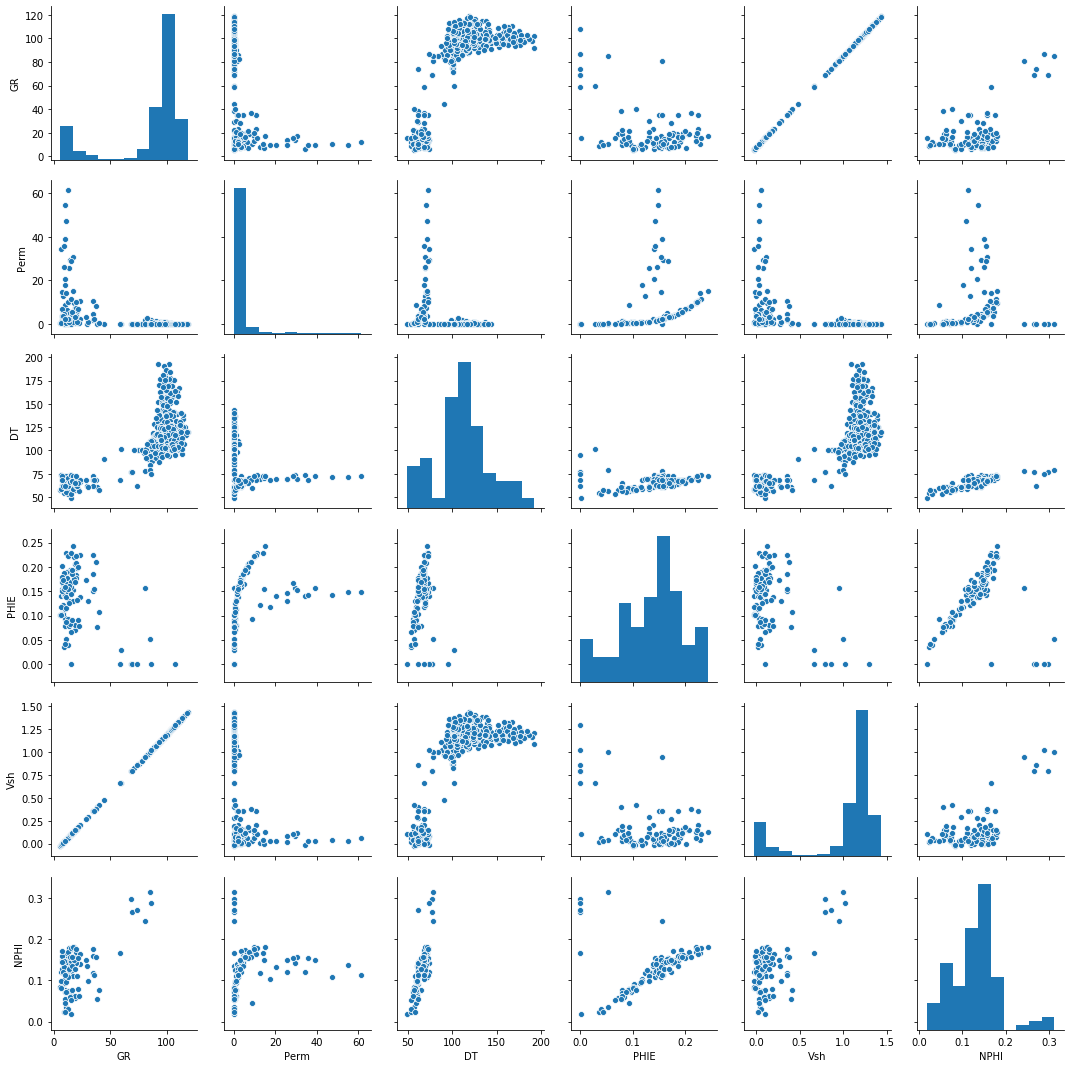

In [20]:
import seaborn as sns

sns.pairplot(logfile)

N.B. The crossplots still doesn't have proper color attributed to the depth that each point corresponds. Still improve the `seaborn` crossplot. 

# 4. QC / Adding Data to Missing Values

In our `KTB-01` data, Deep Resistivity (LLD) data have incomplete data. 

Often in field well data acquisition, well data are collected separately. This causes some well data has missing interval, although there are other records that cover that missing interval. 

We fortunately have additional `KTB_1new` LAS data that cover the LLD value in the missing interval. Import it right away. 

In [0]:
LLD_new = lasreader.LASReader("/content/drive/My Drive/Colab Notebooks/KTB_1new.LAS", null_subs=np.nan)

# Make dataframe of LLD
LLDfile = pd.DataFrame({"LLD":LLD_new.data['LLD']})

We will check the dimension of the LLD data from `KTB-01` and the newly imported and more complete `KTB1_new`

In [0]:
log.data['LLD'].shape, LLD_new.data['LLD'].shape

((696,), (29713,))

It has different dimension, 696 and 29713. What are we gonna do? We adjust the new data into our original `KTB-01` dimension. Technique? **Interpolation**. 

In [0]:
"2D Interpolator"
from scipy import interpolate

def interp(x_new, x_old, y_old):
    tck = interpolate.splrep(x_old, y_old, s=0)
    y_new = interpolate.splev(x_new, tck, der=0)
    return(x_new, y_new)

In [0]:
x_new = log.data['DEPTH']
x_old = LLD_new.data['DEPT']
y_old = LLD_new.data['LLD']
LLD = interp(x_new, x_old, y_old)

# 5. Create Clay Volume Log (VCL)

Calculate VCL from Gamma Ray (GR). 

In [0]:
GRmin = logfile.GR.min()
GRmax = logfile.GR.max()
VSH = (logfile.GR - GRmin) / (GRmax - GRmin)

# 6. Quick Look Shale - Sandstone - Limestone

**Cross plot VSH vs VP log.**

VSH is shale volume that we have derived before. VP is P-velocity log, that is derived from DTC or DT log (delta-time compressional sonic log). Visualizing in VP is more convenient than DT, so let's derive the VP log. 

In [0]:
# if DT in your LAS file has unit microsecond/feet (us/ft), conversion to m/s use this
VP = 1E+06 / log.data['DT'] * 0.3048

# if DT not in us/ft, convert first to us/ft. 

Text(0, 0.5, 'Shale Volume (fraction)')

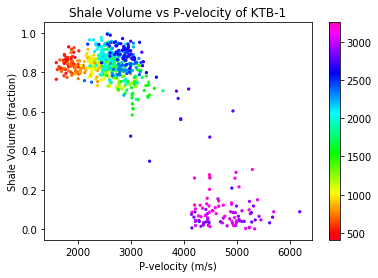

In [0]:
# crossplot VSH vs DT
axisx = VP
axisy = VSH
axisz = depth

xplot(axisx, axisy, axisz)
plt.title('Shale Volume vs P-velocity of KTB-1')
plt.xlabel('P-velocity (m/s)'); plt.ylabel('Shale Volume (fraction)')

**Crossplot LLD vs VP log**

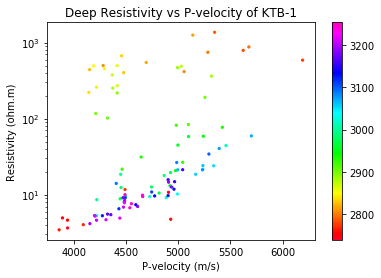

In [0]:
# crossplot LLD vs VP
axisx = VP
axisy = log.data['LLD']
axisz = depth

xplot(axisx, axisy, axisz)
plt.title('Deep Resistivity vs P-velocity of KTB-1')
plt.xlabel('P-velocity (m/s)'); plt.ylabel('Resistivity (ohm.m)')
plt.yscale("log")

For this cross plot, we shall differentiate clay-rich and clay-less lithologies.

# 7. Quick Look Triple Combo - Fluid

We will use **Six Ko Ko rule**. Six Ko Ko rule is a technique for quick look of whether brine (water) or oil or gas fill the lithology, or in other words quick indicator of hydrocarbon-bearing lithology.

You may read an interesting manual about it in LinkedIn: https://www.linkedin.com/pulse/six-ko-rules-easily-detect-oil-gas-water-from-well-log-dosh-nazlan/

**Triple Combo** consists of Gamma Ray, Resistivity, and Density-Neutron logs. We will create Triple Combo.

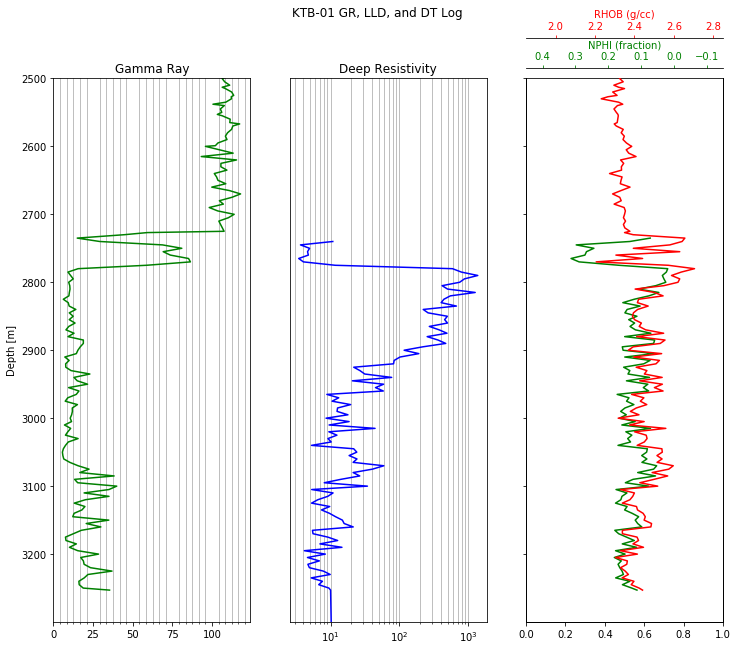

In [0]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)

plt.figure(1)
plt.suptitle("KTB-01 GR, LLD, and DT Log")

plt.subplot(1, 3, 1)
plt.plot(log.data['GR'], log.data['DEPTH'], 'g')
plt.title('Gamma Ray')
plt.gca().xaxis.grid(True, which="minor")
minorLoc = AutoMinorLocator(6)
plt.gca().xaxis.set_minor_locator(minorLoc)
plt.ylabel("Depth [m]")
plt.ylim(2500, max(depth))
plt.gca().invert_yaxis() # invert y axis from positive to negative

plt.subplot(1, 3, 2)
plt.plot(log.data['LLD'], log.data['DEPTH'], 'b')
plt.title('Deep Resistivity')
plt.gca().xaxis.grid(True, which="minor")
minorLoc = AutoMinorLocator(6)
plt.gca().xaxis.set_minor_locator(minorLoc)
plt.gca().axes.get_yaxis().set_ticks([])
plt.xscale("log")
plt.grid()
plt.ylim(2500, max(depth))
plt.gca().invert_yaxis()

ax22=ax[2].twiny()
ax22.set_xlim(-0.15,0.45)
ax22.invert_xaxis()
ax22.plot(log.data['NPHI'], log.data['DEPTH'], label='NPHI (fraction)', color='green') 
ax22.spines['top'].set_position(('outward',10))
ax22.set_xlabel('NPHI (fraction)', color='green')    
ax22.tick_params(axis='x', colors='green')
plt.ylim(2500, max(depth))
ax22.invert_yaxis()
    
ax23=ax[2].twiny()
ax23.set_xlim(1.85,2.85)
ax23.plot(log.data['RHOB'], log.data['DEPTH'] ,label='RHOB (g/cc)', color='red') 
ax23.spines['top'].set_position(('outward',40))
ax23.set_xlabel('RHOB (g/cc)',color='red')
ax23.tick_params(axis='x', colors='red')
plt.ylim(2500, max(depth))
ax22.invert_yaxis()

# 8. Deep Look Matrix Density

To estimate the type of matrix, we use crossplot of RHOB and NPHI. Matrix density is important for the next part: Calculation of effective porosity (PHIE).

We will make a **"RHOB - NPHI cross matrix template"**, as most petrophysicist use. For reference, you may read Crain Ross webpage (https://www.spec2000.net/12-phint.htm).

In [0]:
"RHOB - NPHI cross matrix template"

def deeplook(denfl):
  lsX = np.linspace(0,0.45,46)

  ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
  dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

  ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
  dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

  ssSnpX = np.empty((np.size(lsX),0), float)
  dolSnpX = np.empty((np.size(lsX),0), float)
  ssCnlX = np.empty((np.size(lsX),0), float)
  dolCnlX = np.empty((np.size(lsX),0), float)

  for i in np.nditer(lsX):
      ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
      dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
      ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
      dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

  densma_Ls = 2.71; densma_Ss = 2.65; densma_Dol = 2.87 #densma: density matrix

  denLs = (denfl - densma_Ls) * lsX + densma_Ls
  denSs = (denfl - densma_Ss) * lsX + densma_Ss
  denDol = (denfl - densma_Dol) * lsX + densma_Dol

  %matplotlib inline

  fig, ax = plt.subplots(2, figsize=(14,6))

  ax[0] = plt.subplot(121)
  ax[1] = plt.subplot(122)

  #Setting for first Chart (Neutron Porosity equivalent curves)
  ax[0].set_title("Similar with Chart Por-13a")
  ax[0].set_xlabel("Apparent Limestone Porosity [v.v]")
  ax[0].set_ylabel("True Porosity [v.v]")
  ax[0].set_xlim(-0.05,0.40)
  ax[0].set_ylim(0,0.40)

  ax[0].plot(ssSnpX, lsX, '-', color='blue', label = 'Sandstone-SNP')
  ax[0].plot(ssCnlX, lsX, '--', color='blue', label = 'Sandstone-CNL')
  ax[0].plot(lsX, lsX, '-', color='black', label = 'Limestone')
  ax[0].plot(dolSnpX, lsX, '-', color='red', label = 'Dolomite-SNP')
  ax[0].plot(dolCnlX, lsX, '--', color='red', label = 'Dolomite-CNL')
  ax[0].legend(loc='best')
  ax[0].grid(True)

  #Settings for second chart (Neutron Density)
  ax[1].set_title("ND Crossplot - Chart Por-1e")
  ax[1].set_xlabel("Neutron Porosity [v.v]")
  ax[1].set_ylabel("Density g/cc")
  ax[1].set_xlim(-0.05,0.45)
  ax[1].set_ylim(3,1.9)
  ax[1].plot(ssCnlX, denSs, '.-', color='blue', label = 'Sandstone')
  ax[1].plot(lsX, denLs, '.-', color='black', label = 'Limestone')
  ax[1].plot(dolCnlX, denDol, '.-', color='red', label = 'Dolomite')
  ax[1].legend(loc='best')
  ax[1].grid(True)

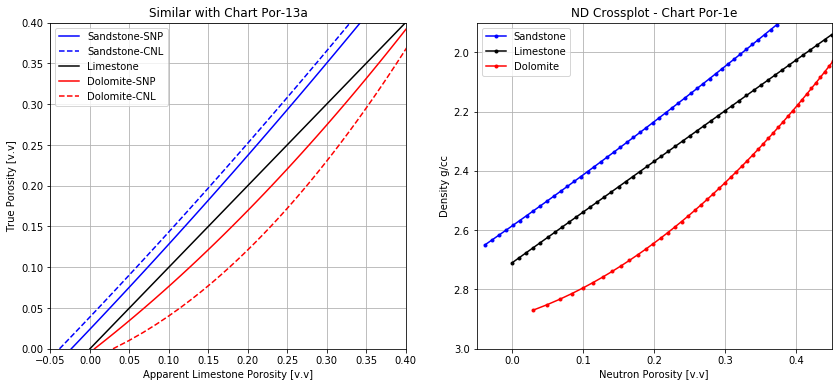

In [0]:
deeplook(1)

# 9. Create Effective Porosity Log (PHIE)

1. Estimate matrix density from density log (RHOB)

Note

In [0]:
import pandas as pd

data = [{"low": 0, "high": 10, "name": "a"},
        {"low": 10, "high": 20, "name": "b"},
        {"low": 20, "high": 30, "name": "c"},
        {"low": 30, "high": 40, "name": "d"},
        {"low": 40, "high": 50, "name": "e"},]

myDF = pd.DataFrame(data)

#data to be binned
mySeries = pd.Series([21, 30.4, 21, 35.1])

#create bins from original data
bins = list(myDF["high"])
bins.insert(0,0)

a=pd.cut(mySeries, bins, labels = myDF["name"])
a

0    c
1    d
2    c
3    d
dtype: category
Categories (5, object): [a < b < c < d < e]

In [0]:
x = np.random.uniform(1,20,size=20)
y = np.random.uniform(1,100,size=20)
z = np.random.uniform(1,100,size=20)

df_3d = pd.DataFrame()
df_3d['x'] = x
df_3d['y'] = y
df_3d['z'] = z

sns.pairplot(df_3d, hue='x')